## **The Working Principle**
<br><br>
###  **Back Propogation Neural Network (BPNN) and Convolutional Neural Network (CNN) Application**

The feature extraction performed by the base consists of three basic operations:




Filter an image for a particular feature (convolution)
Detect that feature within the filtered image (ReLU)
Condense the image to enhance the features (maximum pooling)
The next figure illustrates this process. You can see how these three operations are able to isolate some particular characteristic of the original image (in this case, horizontal lines).

An example of the feature extraction process.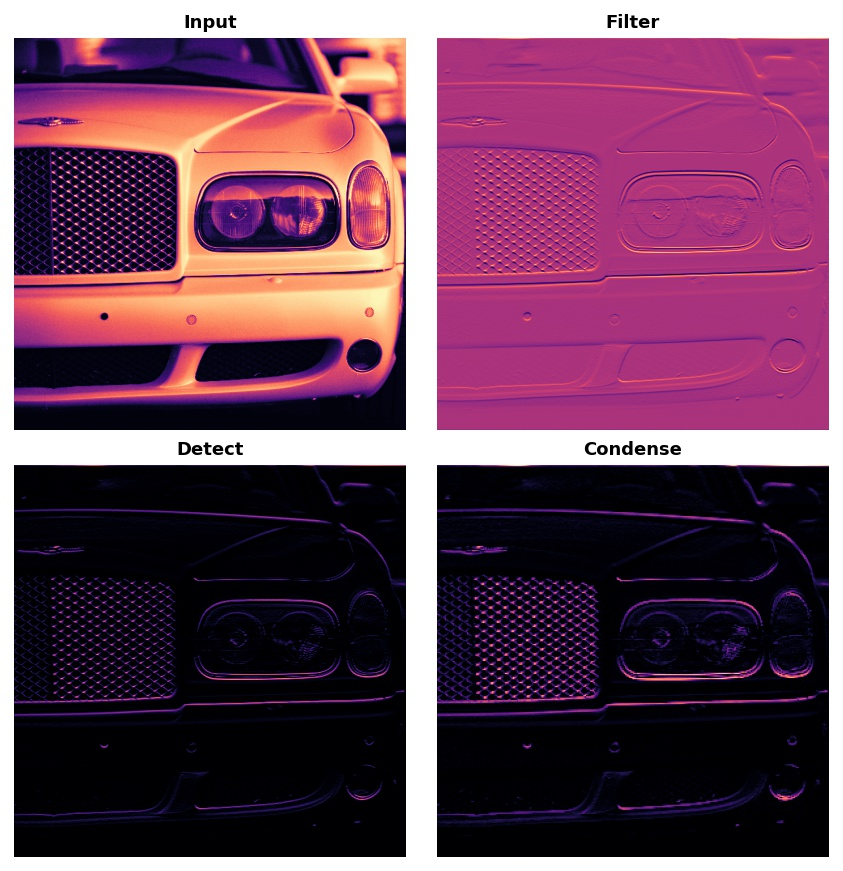

Weights
The weights a convnet learns during training are primarily contained in its convolutional layers. These weights we call kernels. We can represent them as small arrays:

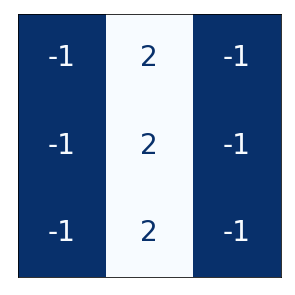<br><br>
A 3x3 kernel.
A kernel operates by scanning over an image and producing a weighted sum of pixel values. In this way, a kernel will act sort of like a polarized lens, emphasizing or deemphasizing certain patterns of information.

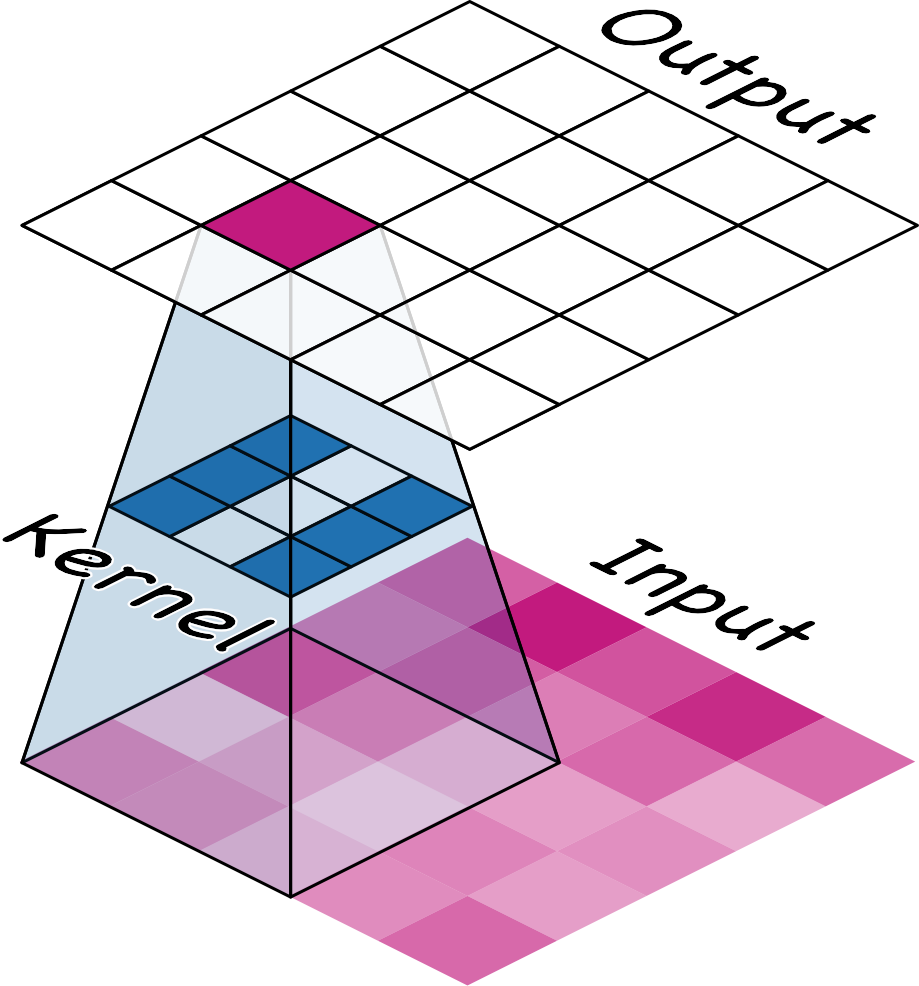



# **Stride <br><br>**
The distance the window moves at each step is called the stride. We need to specify the stride in both dimensions of the image: one for moving left to right and one for moving top to bottom. This animation shows strides=(2, 2), a movement of 2 pixels each step.

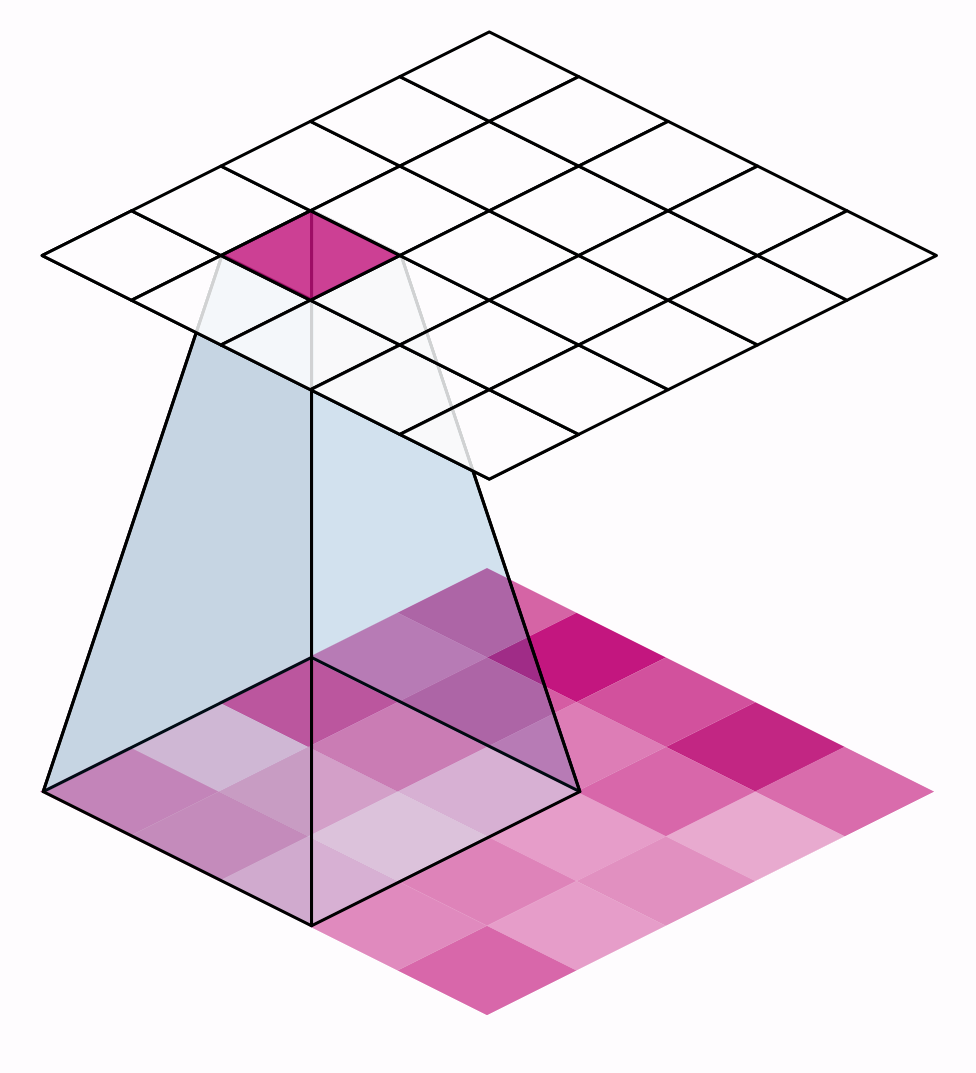



# **Padding**
When performing the sliding window computation, there is a question as to what to do at the boundaries of the input. Staying entirely inside the input image means the window will never sit squarely over these boundary pixels like it does for every other pixel in the input. Since we aren't treating all the pixels exactly the same, could there be a problem?

What the convolution does with these boundary values is determined by its padding parameter. In TensorFlow, you have two choices: either **padding='same' or padding='valid'**

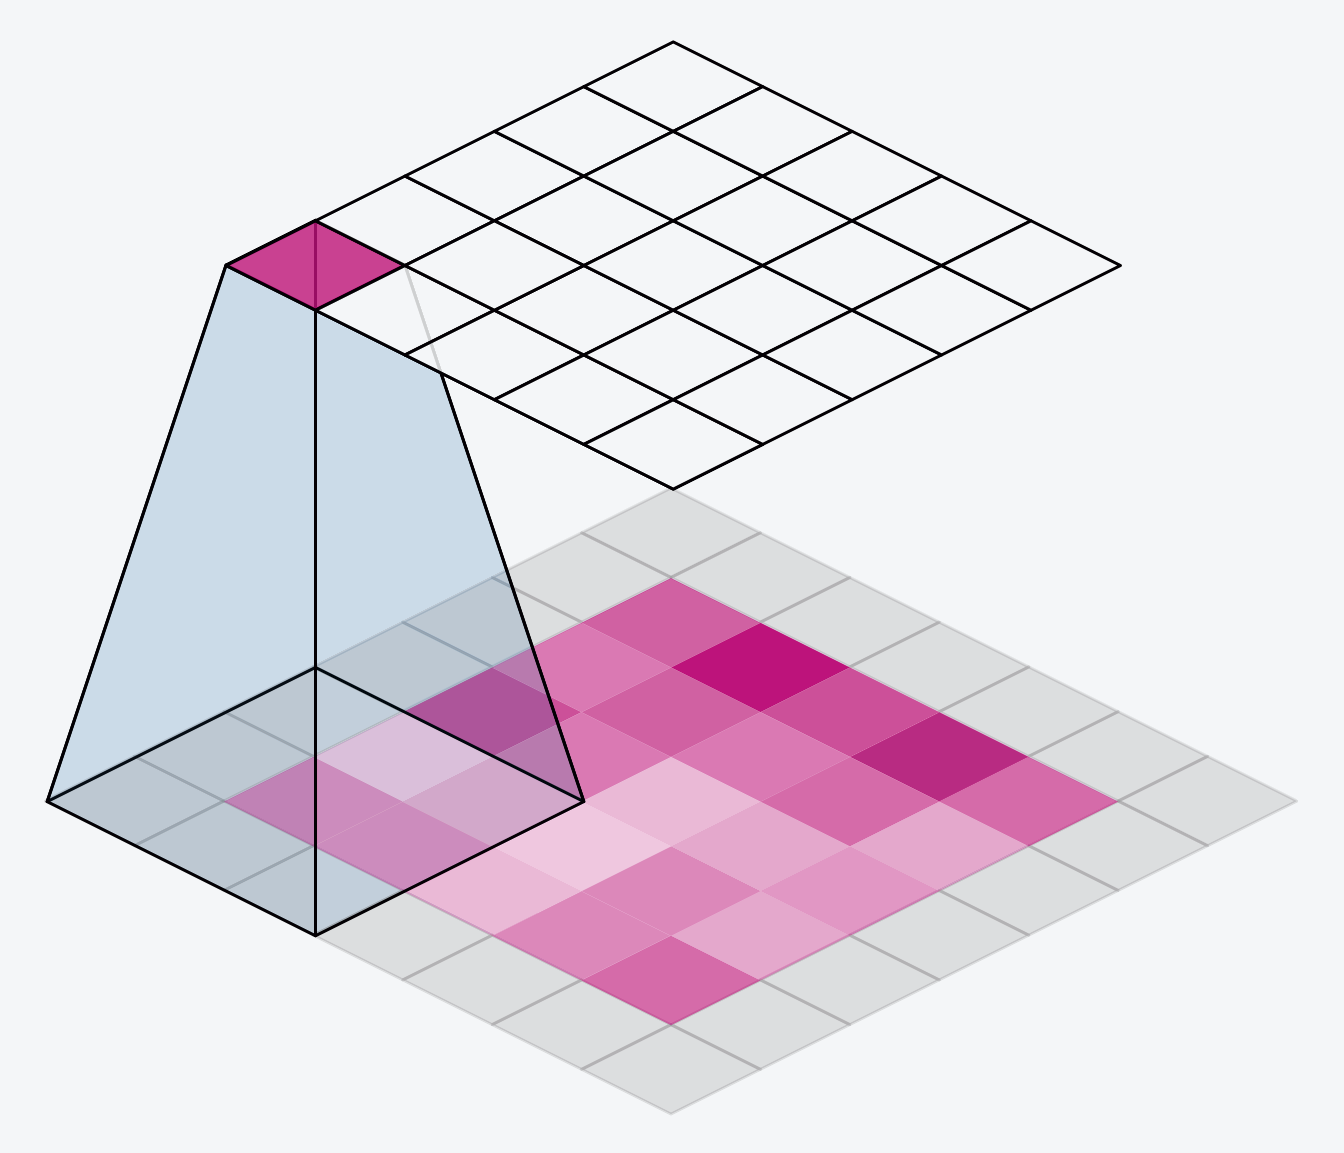

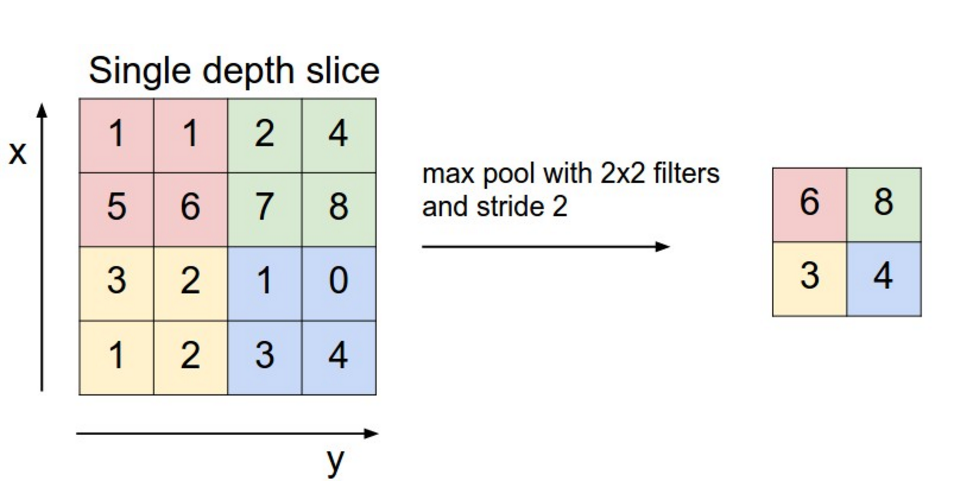

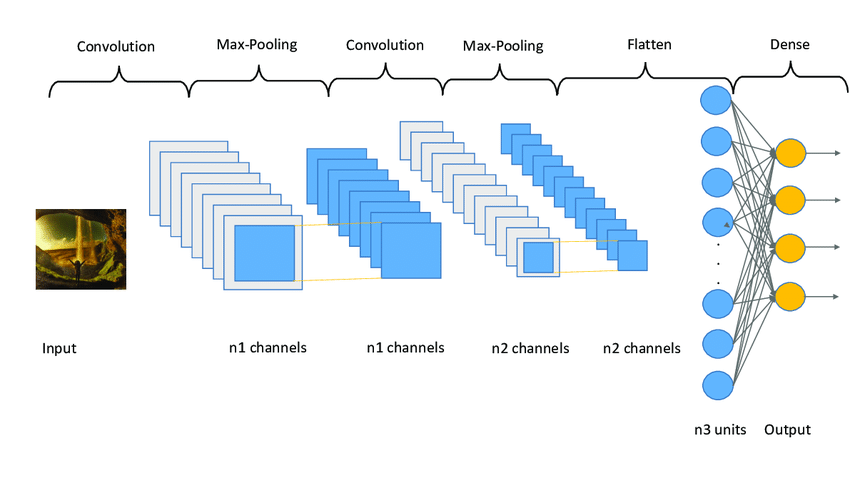

# PART - 1: Data Extraction
## Importing required libraries

In [ ]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

In [ ]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [ ]:
data = []

In [ ]:
# images under '0' folder
data=load_images_from_folder("extracted_images\\0\\")
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['0'])

print(len(data))

6914


In [ ]:
# images under '1' folder
data1=load_images_from_folder("extracted_images\\1\\")

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

33434


In [ ]:
# images under '2' folder
data2=load_images_from_folder("extracted_images\\2\\")

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

59575


In [ ]:
# images under '3' folder
data3=load_images_from_folder("extracted_images\\3\\")

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

70484


In [ ]:
# images under '4' folder
data4=load_images_from_folder("extracted_images\\4\\")

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

77880


In [ ]:
# images under '5' folder
data5=load_images_from_folder("extracted_images\\5\\")

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

81425


In [ ]:
# images under '6' folder
data6=load_images_from_folder("extracted_images\\6\\")

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

84543


In [ ]:
# images under '7' folder
data7=load_images_from_folder("extracted_images\\7\\")

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

87452


In [ ]:
# images under '8' folder
data8=load_images_from_folder("extracted_images\\8\\")

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

90520


In [ ]:
# images under '9' folder
data9=load_images_from_folder("extracted_images\\9\\")

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

94257


In [ ]:
#assigning images under '-' folder=10
data10=load_images_from_folder("extracted_images\\-\\")

for i in range(0,len(data10)):
    data10[i]=np.append(data10[i],['10'])
data=np.concatenate((data,data10))    
print(len(data))

128254


In [ ]:
#assigning images under '+' folder = 11
data11=load_images_from_folder("extracted_images\\+\\")

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

153366


In [ ]:
#assigning images under 'times' folder(multiplication) = 12
data12=load_images_from_folder("extracted_images\\times\\")

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

156617


In [ ]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

# PART - 2: Model Training-
## Importing Necessary Modules:

In [ ]:
#Model Training
import pandas as pd
import pickle
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import * 
from keras.optimizers import *
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format() # substitute for: keras.backend.image_dim_ordering()
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json

In [ ]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [ ]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,100,208,178,178,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136,255,180,191,185,77,14,0,...,0,0,0,0,0,0,0,0,0,0
2,0,123,193,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,36,77,138,178,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,165,178,178,178,113,0,...,18,0,0,0,0,0,0,0,0,0


In [ ]:
labels=np.array(labels)

In [ ]:
cat=to_categorical(labels,num_classes=13)

In [ ]:
print(cat[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,100,208,178,178,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136,255,180,191,185,77,14,0,...,0,0,0,0,0,0,0,0,0,0
2,0,123,193,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,36,77,138,178,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,165,178,178,178,113,0,...,18,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(156617, 784)

In [ ]:
temp=df_train.to_numpy()

In [ ]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [ ]:
temp.shape[0]

156617

In [ ]:
X_train.shape

(156617, 28, 28, 1)

In [ ]:
l=[]
for i in range(47504):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [ ]:
np.random.seed(7)

In [ ]:
len(l[0])

1

In [ ]:
X_train.shape

(156617, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

In [ ]:
model.fit(X_train, cat, epochs=35, batch_size=200,shuffle=True,verbose=1)

Epoch 1/35
784/784 [==============================] - 59s 62ms/step - loss: 0.4135 - accuracy: 0.8974
Epoch 2/35
784/784 [==============================] - 47s 60ms/step - loss: 0.0710 - accuracy: 0.9797
Epoch 3/35
784/784 [==============================] - 66s 84ms/step - loss: 0.0433 - accuracy: 0.9877
Epoch 4/35
784/784 [==============================] - 49s 61ms/step - loss: 0.0306 - accuracy: 0.9909
Epoch 5/35
784/784 [==============================] - 50s 63ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 6/35
784/784 [==============================] - 49s 62ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 7/35
784/784 [==============================] - 51s 65ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 8/35
784/784 [==============================] - 50s 64ms/step - loss: 0.0156 - accuracy: 0.9953
Epoch 9/35
784/784 [==============================] - 47s 60ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 10/35
784/784 [==============================] - 47s 60ms/step - loss: 0.013

In [ ]:
# Model Saving:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

# PART - 3 : CNN Test - 
## Importing Neccessary Libraries:

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K # substitute for :K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [ ]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_final.h5")

In [ ]:
img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE) #kernel = np.ones((3,3),np.uint8)

In [ ]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

9
[[145, 140, 54, 92], [148, 136, 57, 4], [230, 136, 62, 94], [308, 129, 87, 105], [310, 171, 83, 61], [321, 131, 55, 41], [439, 150, 53, 64], [557, 121, 57, 97], [634, 127, 83, 90]]
[[0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
4
[[145, 140, 54, 92], [230, 136, 62, 94], [308, 129, 87, 105], [439, 150, 53, 64], [557, 121, 57, 97], [634, 127, 83, 90]]


In [ ]:
# IMAGE IDENTIFICATION
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    
    #result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

538*25


In [ ]:
eval(s)

13450

Transfering Data into 

**Diabeties Classification Part B** for Data Processing and Generating Confusion Matrix